In [5]:
import pandas as pd

dataset = pd.read_csv(r"C:\Users\gurra\ENSEMBLE\Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [10]:
base_models = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier(max_depth=3)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

In [11]:
meta_model = LogisticRegression()


In [12]:
classifier=StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)
classifier.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier(max_depth=3)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [13]:
y_pred=classifier.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.9


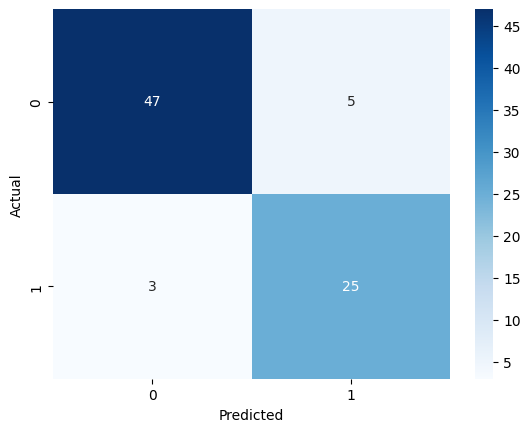

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
import pandas as pd

df = pd.read_csv(r"C:\Users\gurra\ENSEMBLE\train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
target = "Loan_Status"   # adjust if different

X = df.drop(target, axis=1)
y = df[target]


In [18]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [23]:
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_pipeline, num_features),
    ("cat", categorical_pipeline, cat_features)
])


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

In [26]:
base_models = [
    ("lr", LogisticRegression(max_iter=1000)),
    ("dt", DecisionTreeClassifier(max_depth=5)),
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42))
]

meta_model = LogisticRegression()

stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

In [27]:
model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", stacking_model)
])


In [28]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7886178861788617


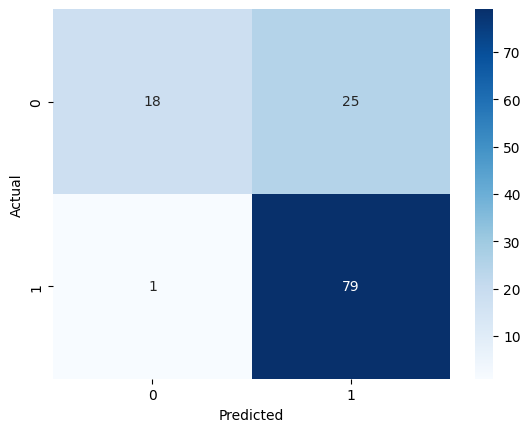

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
import pandas as pd

df = pd.read_csv(r"C:\Users\gurra\ENSEMBLE\kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
X = df.drop(["price", "id"], axis=1)
y = df["price"]


In [43]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [46]:
X = df.drop(["price", "id", "date"], axis=1)
y = df["price"]


In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [49]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10),
    "KNN": KNeighborsRegressor(n_neighbors=7),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel='rbf')
}


In [50]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append([name, r2, rmse])


In [51]:
results_df = pd.DataFrame(
    results,
    columns=["Model", "R2 Score", "RMSE"]
).sort_values(by="R2 Score", ascending=False)

print(results_df)


                       Model  R2 Score           RMSE
3              Random Forest  0.853767  148684.321411
2                        KNN  0.784459  180512.650248
1              Decision Tree  0.721778  205086.981872
0          Linear Regression  0.701190  212539.516638
4  Support Vector Regression -0.063077  400889.679366


In [52]:
X = df.drop(["price", "id", "date"], axis=1)
y = df["price"]


In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [55]:
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=10)
knn = KNeighborsRegressor(n_neighbors=7)
rf = RandomForestRegressor(n_estimators=100, random_state=42)


In [56]:
lr.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [57]:
lr_pred = lr.predict(X_test_scaled)
dt_pred = dt.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)
rf_pred = rf.predict(X_test_scaled)


In [58]:
stacked_X = np.column_stack([
    lr_pred,
    dt_pred,
    knn_pred,
    rf_pred
])


In [59]:
from sklearn.linear_model import LinearRegression, Ridge

In [60]:
meta_model = Ridge()
meta_model.fit(stacked_X, y_test)


Ridge()

In [61]:
stacked_pred = meta_model.predict(stacked_X)


In [62]:
rmse = np.sqrt(mean_squared_error(y_test, stacked_pred))
r2 = r2_score(y_test, stacked_pred)

print("Stacking RMSE:", rmse)
print("Stacking R² Score:", r2)


Stacking RMSE: 145568.53952208924
Stacking R² Score: 0.8598315879327308


In [63]:
rf_pred_test = rf.predict(X_test_scaled)

print("Random Forest R²:", r2_score(y_test, rf_pred_test))


Random Forest R²: 0.8537669783701961


In [64]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

rf_pred = rf.predict(X_test_scaled)

rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("Random Forest R²:", rf_r2)
print("Random Forest RMSE:", rf_rmse)


Random Forest R²: 0.8537669783701961
Random Forest RMSE: 148684.3214107646


In [65]:
stack_r2 = r2_score(y_test, stacked_pred)
stack_rmse = np.sqrt(mean_squared_error(y_test, stacked_pred))

print("Stacking Model R²:", stack_r2)
print("Stacking Model RMSE:", stack_rmse)


Stacking Model R²: 0.8598315879327308
Stacking Model RMSE: 145568.53952208924
